In [1]:
# Run this code block for CSS styling.
from IPython.core.display import HTML

HTML(open("./Styles/custom.css", "r").read())

<p class='notebook_header'><b>CS 309 - Robot Learning</b></p>
<p class='notebook_header'>Robosuite Introduction</p>
<p>Due to the pandemic, we may not be able to access the robot. Instead, we can simulate the robot via Robosuite, a simulation framework for robot learning that's partially developed at UT.</p>
<p>This assignment aims to get you familiar with this framework, so that you will have an eaiser time using it later in this course.</p>
<hr class='separate' />

<p class="section_header"><b>Part I: Installation</b></p>

<p>Please follow the directions here to install robosuite: <a href="https://robosuite.ai/docs/installation.html">https://robosuite.ai/docs/installation.html</a>.</p>
Notes: 
<ol>
    <li>When getting a Mujoco license, make sure you choose the personal student license, which is free for a year. It might take a day or so to approve your account, so get started early! </li>
    <li>You can use a conda environment to organize your packages. Do NOT use python 3.9 - it did not work for me.</li>
    <li>If you are on Mac and you run into this error, '<em>RuntimeError: Could not find GCC executable</em>', try doing <code>brew install gcc@8</code>. For more information, visit <a href="https://github.com/openai/mujoco-py/issues/254">this site</a>.</li>
    <li>If you are on a Mac and your system blocks mujoco from running ('library load disallowed by system policy'), use <code>xattr -d com.apple.quarantine &lt;name&gt;.</li>
    <li>If you choose to install from pip, the command with which to test your installation <code>python -m robosuite.demos.demo_random_action</code> did not work for me. However, the installation is still usable. You can make sure by running the script provided in <a href="https://robosuite.ai/docs/quickstart.html">quick start</a>. </li>
</ol>

<p class="section_header"><b>Part II: Introduction</b></p>
To get a brief overview of the framework, please read the following pages in the documentation. These concepts will be important for you to use this framework.
<ol>
    <li><a href="https://robosuite.ai/docs/overview.html">Basic introduction</a></li>
    <li><a href="https://robosuite.ai/docs/modules/overview.html">An overview of the robosuite architecture</a></li>
    <li><a href="https://robosuite.ai/docs/modules/robots.html">An overview of robots</a></li>
    <li><a href="https://robosuite.ai/docs/modules/objects.html">An overview of objects</a></li>
    <li><a href="https://robosuite.ai/docs/modules/environments.html">An overview of environments</a></li>
    <li>You are also encouraged to read the rest of the "Modules" sections of the documentation, but we won't use them in this assignment.</li>
</ol>

<p class="section_header"><b>Part III: Getting Started</b></p>

Now, let's get our hands dirty.

First, let's try teleoperating the robot with a keyboard.

Download <a href="https://github.com/ARISE-Initiative/robosuite/blob/master/robosuite/demos/demo_device_control.py">this script</a> and run it. I recommend running it in a separate python file since it's easier. If you want to run it in a cell in this notebook, you have to make sure that your jupyter notebook is using the python kernel that you installed robosuite on. Also, if the code throws an error about unrecognized arguments in jupyter, you can add a dummy input variable <code>parser.add_argument("-f", "--fff", help="a dummy argument to fool ipython", default="1")</code> to the list of parser arguments (according to <a href="https://stackoverflow.com/questions/48796169/how-to-fix-ipykernel-launcher-py-error-unrecognized-arguments-in-jupyter">this post</a>).

It's possible that it will throw an error about SpaceMouse. The workaround I found was to delete the reference to SpaceMouse in the utils/input_utils.py file. Namely, change line 246 and 247 to <code>drotation = drotation * 1.5 dpos = dpos * 75</code>.
If you have installed robosuite with pip, you can find the utils folder in the site-packages folder of your python installation. You can find the site-packages folder through <code>python -m site</code>. For example, mine is <code>miniconda3/envs/robosuite/lib/python3.8/site-packages/</code>.

If the code successfully runs, then you should be able to control the robot arm with your keyboard. 

<hr/>



Now, let's try creating your own environment.

Follow <a href="https://robosuite.ai/docs/quickstart.html#building-your-own-environments">this guide</a> to create your own environment. Make sure you understand what each line of the code does. 

As of right now, the step 4 isn't compliant with the current API. 
You should use get_obj() to get the XML tree instead of get_collision(). Also, objects by default have a free joint, so you shouldn't append a new joint. Therefore, the code should be <code>
    sphere = BallObject(
    name="sphere",
    size=[0.04],
    rgba=[0, 0.5, 0.5, 1]).get_obj()
    sphere.set('pos', '1.0 0 1.0')
    world.worldbody.append(sphere)
</code>I have reported this issue to the robosuite team, but they might not have addressed it yet.

If your code runs, you should be able to see your custom environment rendered in an interactive window. 

Be prepared to show your custom environment during office hour.
<hr/>

Below are some python cells to help you explore the robosuite API. Please run each cell and make sure that you understand them. Feel free to experiment with the code and insert print statements to examine the data structures.

Again, make sure that your python kernel for Jupyter Notebook has robosuite installed.

Credits to <a href="https://github.com/ARISE-Initiative/robosuite-notebooks/blob/master/robosuite_101.ipynb">Yuke Zhu</a> for the code.

In [2]:
import numpy as np
import robosuite as suite

from PIL import Image
from IPython.display import display

In [3]:
suite.ALL_ENVIRONMENTS

dict_keys(['Lift', 'Stack', 'NutAssembly', 'NutAssemblySingle', 'NutAssemblySquare', 'NutAssemblyRound', 'PickPlace', 'PickPlaceSingle', 'PickPlaceMilk', 'PickPlaceBread', 'PickPlaceCereal', 'PickPlaceCan', 'Door', 'Wipe', 'TwoArmLift', 'TwoArmPegInHole', 'TwoArmHandover'])

In [4]:
suite.ALL_ROBOTS

dict_keys(['Sawyer', 'Baxter', 'Panda', 'Jaco', 'Kinova3', 'IIWA', 'UR5e'])

In [5]:
suite.ALL_GRIPPERS

dict_keys(['RethinkGripper', 'PandaGripper', 'JacoThreeFingerGripper', 'JacoThreeFingerDexterousGripper', 'WipingGripper', 'Robotiq85Gripper', 'Robotiq140Gripper', 'RobotiqThreeFingerGripper', 'RobotiqThreeFingerDexterousGripper', None])

In [6]:
suite.ALL_CONTROLLERS

dict_keys(['JOINT_VELOCITY', 'JOINT_TORQUE', 'JOINT_POSITION', 'OSC_POSITION', 'OSC_POSE', 'IK_POSE'])

In [7]:
env = suite.make(
    env_name="Lift",
    robots="Sawyer",
    has_renderer=False,
    ignore_done=True,
    use_camera_obs=True,
    camera_names=["frontview", "agentview"]
)

obs = env.reset()

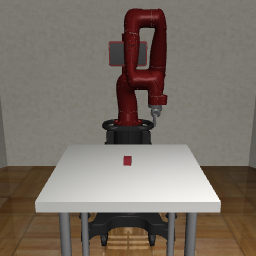

In [8]:
frontview = Image.fromarray(obs['frontview_image'][::-1])
display(frontview)

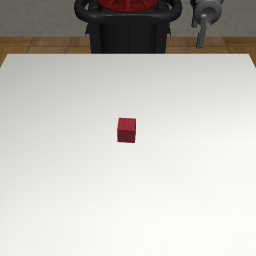

In [9]:
agentview = Image.fromarray(obs['agentview_image'][::-1])
display(agentview)

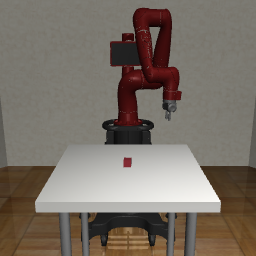

In [10]:
low, high = env.action_spec # get action limits
for i in range(100):
    action = np.random.uniform(low, high) # sample random action
    obs, reward, done, _ = env.step(action)
    
display(Image.fromarray(obs['frontview_image'][::-1]))

In [11]:
print('number of bodies:', env.sim.model.nbody)
print('number of joints:', env.sim.model.njnt)
print('number of generalized coordinates:', env.sim.model.nq)
print('number of degrees of freedom:', env.sim.model.nv)
print('number of degrees of freedom:', env.sim.model.nu)
print('number of activation states:', env.sim.model.na)

number of bodies: 33
number of joints: 10
number of generalized coordinates: 16
number of degrees of freedom: 15
number of degrees of freedom: 9
number of activation states: 0


In [12]:
print(env.sim.model.body_names)

('world', 'table', 'robot0_base', 'robot0_right_arm_base_link', 'robot0_right_l0', 'robot0_head', 'robot0_screen', 'robot0_head_camera', 'robot0_right_torso_itb', 'robot0_right_l1', 'robot0_right_l2', 'robot0_right_l3', 'robot0_right_l4', 'robot0_right_arm_itb', 'robot0_right_l5', 'robot0_right_hand_camera', 'robot0_right_wrist', 'robot0_right_l6', 'robot0_right_hand', 'gripper0_gripper_base', 'gripper0_l_finger', 'gripper0_l_finger_tip', 'gripper0_r_finger', 'gripper0_r_finger_tip', 'robot0_right_l4_2', 'robot0_right_l2_2', 'robot0_right_l1_2', 'mount0_base', 'mount0_controller_box', 'mount0_pedestal_feet', 'mount0_torso', 'mount0_pedestal', 'cube_main')


In [13]:
body_id = 1

print(env.sim.model.body_names[body_id])
print(env.sim.data.body_xpos[body_id])
print(env.sim.data.body_xquat[body_id])

body_id = -1

print()
print(env.sim.model.body_names[body_id])
print('Frame origin:\n', env.sim.data.body_xpos[body_id])
print('\nRotation quaternion:\n', env.sim.data.body_xquat[body_id])
print('\nRotation matrix:\n', env.sim.data.body_xmat[body_id].reshape(3,3))

table
[0.    0.    0.775]
[1. 0. 0. 0.]

cube_main
Frame origin:
 [-0.01276225 -0.00277095  0.82053282]

Rotation quaternion:
 [ 7.33733100e-01 -1.07789348e-08  3.81667094e-07  6.79437810e-01]

Rotation matrix:
 [[ 7.67285249e-02 -9.97052021e-01  5.45436328e-07]
 [ 9.97052021e-01  7.67285249e-02  5.34455831e-07]
 [-5.74730792e-07  5.02820386e-07  1.00000000e+00]]


In [14]:
# simple example of coordinate transformations
import robosuite.utils.transform_utils as T

T.quat2mat(T.convert_quat(np.array(env.sim.data.body_xquat[body_id]), to="xyzw"))

array([[ 7.67285824e-02, -9.97052073e-01,  5.45436365e-07],
       [ 9.97052073e-01,  7.67285824e-02,  5.34455808e-07],
       [-5.74730848e-07,  5.02820399e-07,  1.00000000e+00]])

In [15]:
env.sim.data.body_xmat[body_id].reshape(3, 3)

array([[ 7.67285249e-02, -9.97052021e-01,  5.45436328e-07],
       [ 9.97052021e-01,  7.67285249e-02,  5.34455831e-07],
       [-5.74730792e-07,  5.02820386e-07,  1.00000000e+00]])

In [16]:
env.sim.data.body_xpos[body_id]

array([-0.01276225, -0.00277095,  0.82053282])

In [17]:
# get information of all bodies
for i in range(env.sim.model.nbody):
    name = env.sim.model.body_names[i]
    body_id = env.sim.model.body_name2id(name)
    body_xpos = env.sim.data.body_xpos[body_id]
    print(body_id, name, body_xpos)

0 world [0. 0. 0.]
1 table [0.    0.    0.775]
2 robot0_base [-0.56   0.     0.912]
3 robot0_right_arm_base_link [-0.56   0.     0.912]
4 robot0_right_l0 [-0.56   0.     0.992]
5 robot0_head [-0.56    0.      1.2885]
6 robot0_screen [-0.53099548  0.00766408  1.3935    ]
7 robot0_head_camera [-0.53795396  0.00582539  1.505072  ]
8 robot0_right_torso_itb [-0.61317494 -0.01405081  1.212     ]
9 robot0_right_l1 [-0.49446127  0.06903387  1.229     ]
10 robot0_right_l2 [-0.48967879  0.21768843  1.36236117]
11 robot0_right_l3 [-0.40446761  0.19682067  1.61069077]
12 robot0_right_l4 [-0.30537468  0.08694072  1.51202853]
13 robot0_right_arm_itb [-0.21958482  0.10947134  1.48405584]
14 robot0_right_l5 [-0.15363766  0.14715183  1.28856376]
15 robot0_right_hand_camera [-0.20901398  0.20113265  1.24979334]
16 robot0_right_wrist [-0.18246708  0.24830477  1.28162008]
17 robot0_right_l6 [-0.17701754  0.24221318  1.1719241 ]
18 robot0_right_hand [-0.17583527  0.24090708  1.14798885]
19 gripper0_gripper

<p class="section_header"><b>Part IV: Record Human Demonstration</b></p>

The primary topic of this research class is learning by demonstration. With robosuite, it's really easy to record human demonstrations.

In this final part of the assignment, you will learn to record and play back a human demonstration.

Using the collect human demonstration and play back demonstrations from hdf5.py scripts from <a href="https://github.com/ARISE-Initiative/robosuite/tree/master/robosuite/scripts">here</a>, record and play back an episode of the Stack environment.

Make sure to read the comments in source code to understand how to use them. If you have followed part III, you should not have any issues with the SpaceMouse error. 

Get ready to show the playback of your demontration during office hours.